# Stochastic Models in Finance: TP1
## Monte Carlo for the Black-Scholes model
By: 
- Adonis JAMAL
- Ayoub EL KBADI
- Fotios KAPOTOS

In [1]:
import numpy as np
from scipy.stats import norm
from matplotlib import pyplot as plt

In [2]:
# Model values
S0 = 100    # initial stock price
K = 100     # strike price
T = 1.0     # time to maturity in years
r = 0.05    # risk-free rate
sigma = 0.2 # volatility

# Black Scholes formula for European call option
def black_scholes_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

# Delta of the call option
def delta_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    return norm.cdf(d1)

# Gamma of the call option
def gamma_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    return norm.pdf(d1) / (S * sigma * np.sqrt(T))

In [3]:
S_vec = np.linspace(50, 150, 100)
T_vec = [0.1, 0.5, 1.0, 2.0]

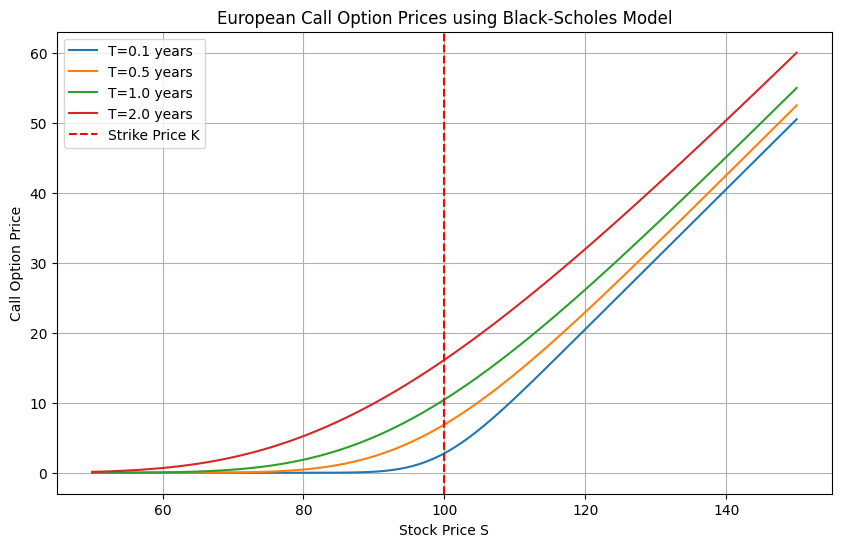

In [4]:
# Price of European call option at different maturities using Black-Scholes formula

plt.figure(figsize=(10, 6))
for T in T_vec:
    call_prices = [black_scholes_call(S, K, T, r, sigma) for S in S_vec]
    plt.plot(S_vec, call_prices, label=f'T={T} years')

plt.axvline(K, color='red', linestyle='--', label='Strike Price K')
plt.title('European Call Option Prices using Black-Scholes Model')
plt.xlabel('Stock Price S')
plt.ylabel('Call Option Price')
plt.legend()
plt.grid(True)
plt.show()

Le prix du call est une fonction croissante et convexe de $S_0$. Plus la maturité $T$ est longue, plus le prix de l'option est élevé.

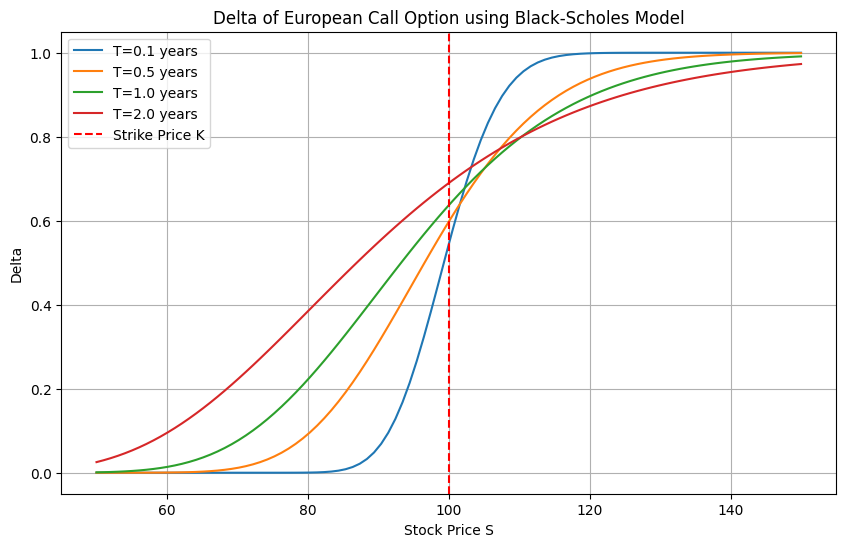

In [5]:
# Delta Graph

plt.figure(figsize=(10, 6))
for T in T_vec:
    deltas = [delta_call(S, K, T, r, sigma) for S in S_vec]
    plt.plot(S_vec, deltas, label=f'T={T} years')

plt.axvline(K, color='red', linestyle='--', label='Strike Price K')
plt.title('Delta of European Call Option using Black-Scholes Model')
plt.xlabel('Stock Price S')
plt.ylabel('Delta')
plt.legend()
plt.grid(True)
plt.show()

Le Delta (sensibilité du prix de l'option au prix du sous-jacent) va de 0 à 1 pour un call. Il est proche de 0 lorsque l'option est très out of the money (prix du sous-jacent très inférieur au strike price) et proche de 1 lorsque l'option est très in the money (prix du sous-jacent très supérieur au strike price). Le Delta augmente avec la maturité $T$ car une option avec une maturité plus longue a une probabilité plus élevée d'être dans le money à l'échéance. De plus, plus le $T$ est faible, plus la transition de 0 à 1 est abrupte autour du strike price $K$.

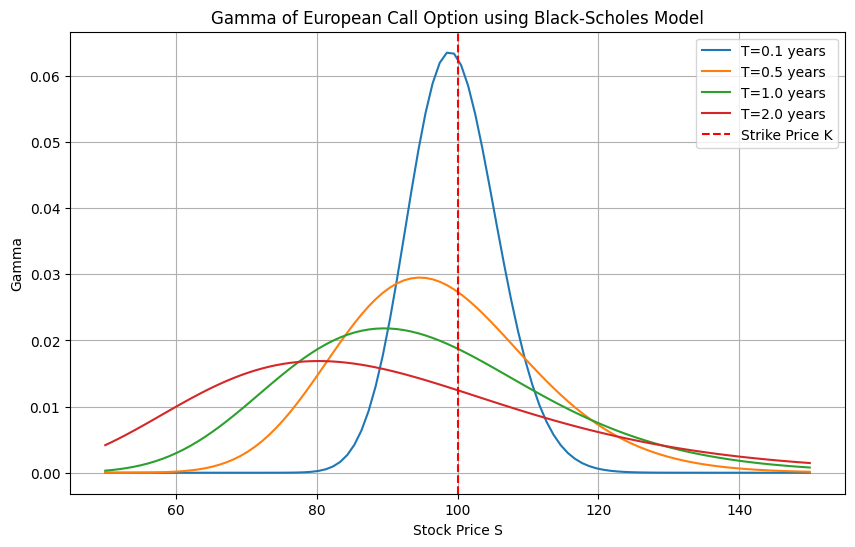

In [6]:
# Gamma Graph

plt.figure(figsize=(10, 6))
for T in T_vec:
    gammas = [gamma_call(S, K, T, r, sigma) for S in S_vec]
    plt.plot(S_vec, gammas, label=f'T={T} years')

plt.axvline(K, color='red', linestyle='--', label='Strike Price K')
plt.title('Gamma of European Call Option using Black-Scholes Model')
plt.xlabel('Stock Price S')
plt.ylabel('Gamma')
plt.legend()
plt.grid(True)
plt.show()

Le Gamma (convexité ou sensibilité du Delta au prix du sous-jacent) est toujours positif pour un call. Il atteint son maximum lorsque le prix du sous-jacent est proche du strike price $K$. Le Gamma diminue avec l'augmentation de la maturité $T$ car les options à plus long terme sont moins sensibles aux variations immédiates du prix du sous-jacent. Il est d'autant plus élevé que l'option est proche de l'échéance, reflétant une plus grande sensibilité du Delta aux variations du prix du sous-jacent à court terme.

In [7]:
def monte_carlo_call_price(S0, K, T, r, sigma, num_simulations):
    # Simulate end stock prices
    Z = np.random.standard_normal(num_simulations)
    ST = S0 * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * Z)

    # Calculate N payoffs
    payoffs = np.maximum(ST - K, 0)

    # Discounted expected payoff
    discounted_payoffs = np.exp(-r * T) * payoffs
    price = np.mean(discounted_payoffs)

    # 95% Confidence Interval
    SE = np.std(discounted_payoffs) / np.sqrt(num_simulations)    
    ci_low = price - 1.96 * SE
    ci_high = price + 1.96 * SE

    return price, ci_low, ci_high

True Black-Scholes Price: 16.1268


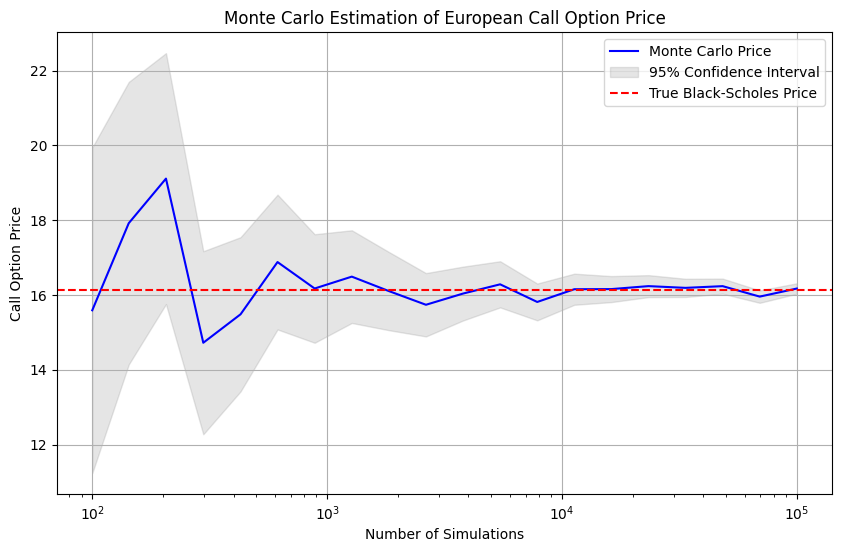

In [8]:
true_price = black_scholes_call(S0, K, T, r, sigma)
print(f"True Black-Scholes Price: {true_price:.4f}")

N_vec = np.logspace(2, 5, 20, dtype=int)

mc_prices = []
ci_lows = []
ci_highs = []

for N in N_vec:
    price, ci_low, ci_high = monte_carlo_call_price(S0, K, T, r, sigma, N)
    mc_prices.append(price)
    ci_lows.append(ci_low)
    ci_highs.append(ci_high)

plt.figure(figsize=(10, 6))
plt.plot(N_vec, mc_prices, 'b-', label='Monte Carlo Price')
plt.fill_between(N_vec, ci_lows, ci_highs, color='gray', alpha=0.2, label='95% Confidence Interval')
plt.axhline(true_price, color='red', linestyle='--', label='True Black-Scholes Price')
plt.xscale('log')
plt.title('Monte Carlo Estimation of European Call Option Price')
plt.xlabel('Number of Simulations')
plt.ylabel('Call Option Price')
plt.legend()
plt.grid(True)
plt.show()

Le prix Monte Carlo converge bien vers le prix théorique de Black-Scholes lorsque le nombre de simulations augmente. L'erreur (l'intervalle de confiance) diminue avec l'augmentation du nombre de simulations, illustrant la loi des grands nombres.\
Théoriquement, l'erreur devrait diminuer proportionnellement à $1/\sqrt{N}$.

In [9]:
# Relative error
errors = np.abs(np.array(mc_prices) - true_price) / true_price
print(f"Relative error for N = {N_vec[-1]}: {errors[-1]*100:.6f}")

try:
    N_01 = N_vec[np.where(errors < 0.01)[0][0]]
    print(f"Number of simulations needed for less than 1% relative error: {N_01}")
except IndexError:
    print("More than 10,000 simulations are needed to achieve less than 1% relative error.")

Relative error for N = 100000: 0.284322
Number of simulations needed for less than 1% relative error: 885


In [10]:
def monte_carlo_call(S0, K, T, r, sigma, N):
    """Estimate the price of a European call option using Monte Carlo simulation. No need for confidence intervals here."""
    Z = np.random.standard_normal(N)
    ST = S0 * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * Z)
    payoffs = np.maximum(ST - K, 0)
    price = np.exp(-r * T) * np.mean(payoffs)
    return price

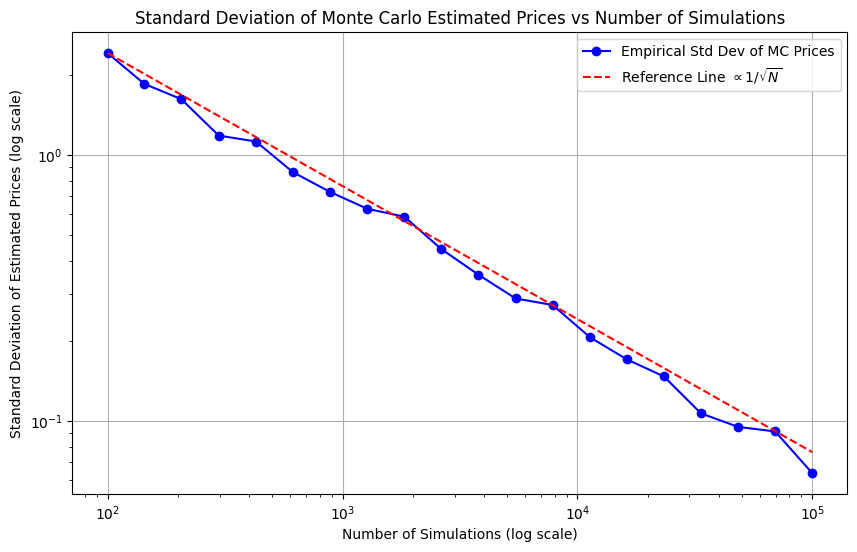

In [11]:
num_prices = 100

N_vec = np.logspace(2, 5, 20, dtype=int)
std_devs = []

for N in N_vec:
    prices_N = []
    for _ in range(num_prices):
        price = monte_carlo_call(S0, K, T, r, sigma, N)
        prices_N.append(price)

    std_devs.append(np.std(prices_N, ddof=1))

plt.figure(figsize=(10, 6))
plt.plot(N_vec, std_devs, 'bo-', label='Empirical Std Dev of MC Prices')
C = std_devs[0] * np.sqrt(N_vec[0])
ref_line = C / np.sqrt(N_vec)
plt.plot(N_vec, ref_line, 'r--', label=r'Reference Line $\propto 1/\sqrt{N}$')
plt.xscale('log')
plt.yscale('log')
plt.title('Standard Deviation of Monte Carlo Estimated Prices vs Number of Simulations')
plt.xlabel('Number of Simulations (log scale)')
plt.ylabel('Standard Deviation of Estimated Prices (log scale)')
plt.legend()
plt.grid(True)
plt.show()

L'écart-type empirique suit très bien la tendance théorique, confirmant que l'erreur de l'estimation Monte Carlo diminue comme $1/\sqrt{N}$ et donc le théorème central limite s'applique.\
Pour diviser l'erreur par 10, il faudrait multiplier le nombre de simulations par 100.

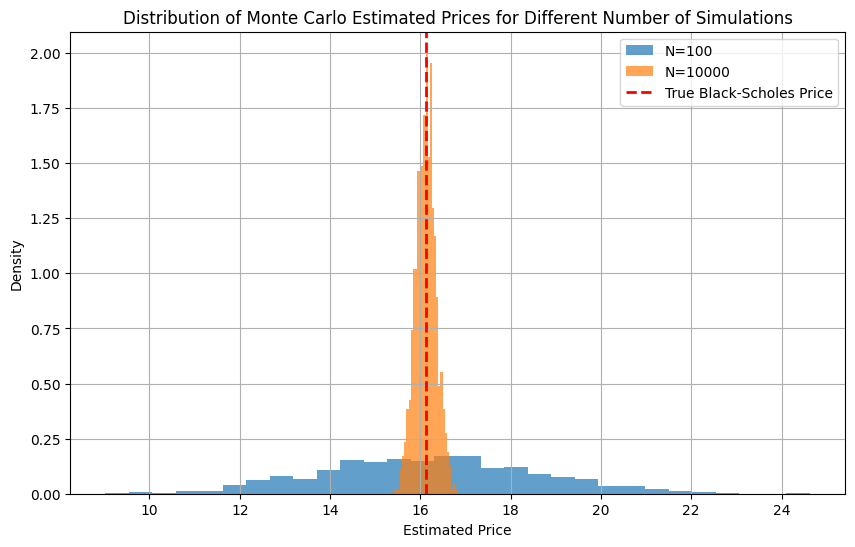

In [12]:
num_prices = 1000

N_low = 100
N_high = 10000

prices_low = []
prices_high = []
for _ in range(num_prices):
    price_low = monte_carlo_call(S0, K, T, r, sigma, N_low)
    prices_low.append(price_low)

    price_high = monte_carlo_call(S0, K, T, r, sigma, N_high)
    prices_high.append(price_high)

plt.figure(figsize=(10, 6))
plt.hist(prices_low, bins=30, density=True, alpha=0.7, label=f'N={N_low}')
plt.hist(prices_high, bins=30, density=True, alpha=0.7, label=f'N={N_high}')
plt.axvline(true_price, color='red', linestyle='--', linewidth=2, label='True Black-Scholes Price')
plt.legend()
plt.title('Distribution of Monte Carlo Estimated Prices for Different Number of Simulations')
plt.xlabel('Estimated Price')
plt.ylabel('Density')
plt.grid(True)
plt.show()

On obtient deux distributions normales centrées sur le vrai prix donné par Black-Scholes. L'estimation Monte Carlo est donc non biaisée et on confirme que le théorème central limite s'applique.\
La distribution pour N = 10000 est plus concentrée autour du vrai prix que pour N = 100, illustrant la diminution de l'erreur avec l'augmentation du nombre de simulations.

In [13]:
%%timeit -n 10 -r 5
monte_carlo_call(S0, K, T, r, sigma, 10**6)

56.1 ms ± 1.75 ms per loop (mean ± std. dev. of 5 runs, 10 loops each)
